In [155]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns 
import matplotlib as plt 
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [157]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [158]:
df.isna().sum().sum()

297

In [159]:
df["InternetService"] = df["InternetService"].fillna("")

In [160]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [161]:
df.duplicated().sum()

0

In [162]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [163]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


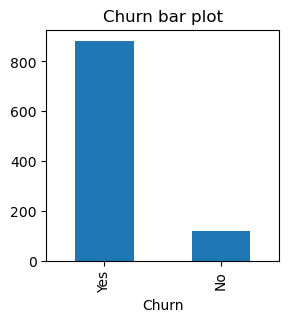

In [164]:
import matplotlib.pyplot as plt 
df['Churn'].value_counts().plot(kind= "bar", figsize=(3,3), title=('Churn bar plot'))
plt.ylabel("")
plt.show()


In [165]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [166]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [167]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

<Axes: ylabel='Age'>

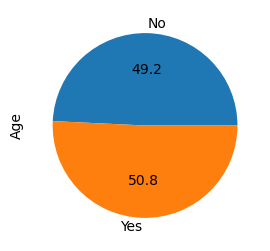

In [168]:
df.groupby("Churn")["Age"].mean().plot(kind="pie", autopct="%.01f", figsize=(3,3))

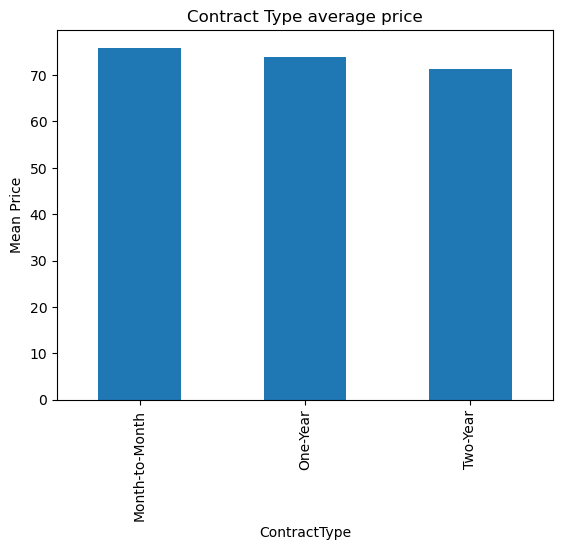

In [169]:
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar",title="Contract Type average price")
plt.show()

In [170]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [171]:
y= df[['Churn']]
X = df[['Age','Gender','Tenure', 'MonthlyCharges']]

In [172]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [173]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [174]:
X['Gender'] = X['Gender'].apply(lambda x:1 if x== "Female" else 0)

In [175]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [176]:
y["Churn"]= y["Churn"].apply(lambda x:1 if x =="Yes" else 0 )

In [177]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X, y = smote.fit_resample(X, y)

In [178]:
y.value_counts()

Churn
0        883
1        883
Name: count, dtype: int64

In [179]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split (X,y, test_size=0.2)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [181]:
X_train = scaler.fit_transform(X_train)

In [182]:
import joblib
joblib.dump(scaler , "Scaler.pkl")

['Scaler.pkl']

In [183]:
X_test = scaler.fit_transform(X_test)

In [184]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def modelperformance(predictions):
    print("Accuracy Score on model is {}".format(accuracy_score(y_test, predictions)))


In [185]:
import warnings 
warnings.filterwarnings('ignore')

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [187]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [188]:
y_pred= log_model.predict(X_test)
y_prob_lr = log_model.predict_proba(X_test)[:, 1]

In [189]:
modelperformance(y_pred)

Accuracy Score on model is 0.6807909604519774


In [190]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={
    "n_neighbors":[3,5,7,9],
    "weights":["uniform",'distance'],
    }

In [191]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [192]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [193]:
gridkn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [194]:
y_predkn = gridkn.predict(X_test)
y_probkn= gridkn.predict_proba(X_test)[:, 1]

In [195]:
modelperformance(y_predkn)

Accuracy Score on model is 0.864406779661017


In [196]:
from sklearn.svm import SVC
svm = SVC(probability= True)


In [197]:
param_gridsvc = {
    "C": [0.01, 0.1, 0.5 ,1 ],
    "kernel": ["linear","rbf","poly"],
}

In [198]:
gridsvc= GridSearchCV(svm, param_gridsvc, cv=5)

In [199]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [200]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [201]:
y_predsvc= gridsvc.predict(X_test)
y_prob_svc= gridsvc.predict_proba(X_test)[:, 1]

In [202]:
modelperformance(y_predsvc)

Accuracy Score on model is 0.8192090395480226


In [203]:
from sklearn.tree import DecisionTreeClassifier
param_grid_dtc = {
    "criterion": ["gini",'entropy'],
    "splitter": ['best','random'],
    'max_depth': [None, 10,20,30,40],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [204]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid_dtc,cv=5)

In [205]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [206]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [207]:
y_pred_dtc = grid_tree.predict(X_test)

In [208]:
modelperformance(y_pred_dtc)

Accuracy Score on model is 0.8220338983050848


In [209]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier()

In [210]:
param_grid_rfc= {
    "n_estimators": [32,64,128,256],
    "max_features": [2,3,4],
    "bootstrap":[True, False]
}

In [211]:
grid_rfc = GridSearchCV(rfc_model, param_grid_rfc,cv=5)

In [212]:
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [213]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 128}

In [214]:
y_pred_rfc= grid_rfc.predict(X_test)
y_prob_rf = grid_rfc.predict_proba(X_test)[:, 1]

In [215]:
modelperformance(y_pred_rfc)

Accuracy Score on model is 0.864406779661017


In [216]:
! pip install  xgboost lightgbm catboost

Gradient Boosting Classifier Metrics:
Accuracy: 0.8333333333333334
Precision: 0.9343065693430657
Recall: 0.7191011235955056
F1 Score: 0.8126984126984127
ROC-AUC: 0.9117881767109295

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       176
           1       0.93      0.72      0.81       178

    accuracy                           0.83       354
   macro avg       0.85      0.83      0.83       354
weighted avg       0.85      0.83      0.83       354



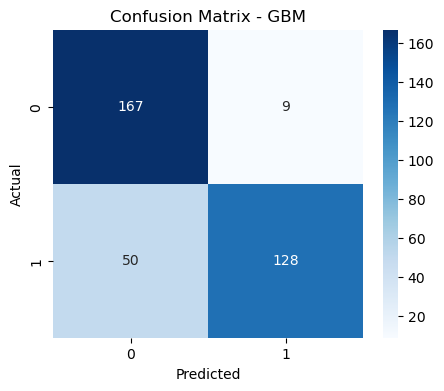

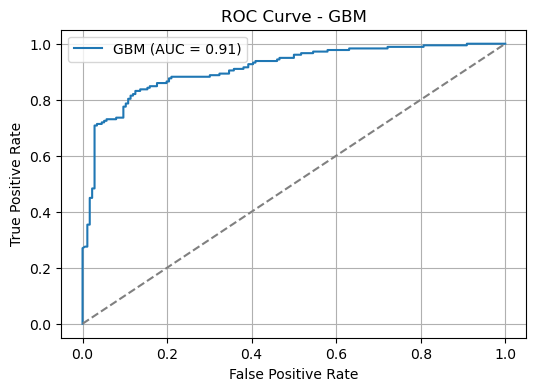

In [217]:

# Gradient Boosting Model with Evaluation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train GBM
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]

# Metrics
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Precision:", precision_score(y_test, y_pred_gbm))
print("Recall:", recall_score(y_test, y_pred_gbm))
print("F1 Score:", f1_score(y_test, y_pred_gbm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - GBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_gbm)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="GBM (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_gbm)))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GBM")
plt.legend()
plt.grid()
plt.show()


In [218]:
import xgboost as xgb
import lightgbm as lgb
# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}
grid_xgb = GridSearchCV(xgb_model, xgb_params, scoring='roc_auc', cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

y_pred_xgb = grid_xgb.predict(X_test)
y_prob_xgb = grid_xgb.predict_proba(X_test)[:, 1]

# LightGBM Model
lgbm_model = lgb.LGBMClassifier(random_state= 42)
lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}
grid_lgb = GridSearchCV(lgbm_model, lgb_params, scoring='roc_auc', cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
best_lgbm = grid_lgb.best_estimator_
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = grid_lgb.predict(X_test)
y_prob_lgbm = grid_lgb.predict_proba(X_test)[:, 1]

# Summary Table for All Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Define metric function
def get_metrics(y_test, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

# Collect results
results = {
    "Logistic Regression": get_metrics(y_test, y_pred, y_prob_lr),
    "KNeighborsClassifier":get_metrics(y_test, y_predkn,y_probkn),
    "Support Vector Classifier": get_metrics(y_test, y_predsvc,y_prob_svc),
    "Random Forest": get_metrics(y_test, y_pred_rfc, y_prob_rf),
    "Gradient Boosting": get_metrics(y_test, y_pred_gbm, y_prob_gbm),
    "XGBoost": get_metrics(y_test, y_pred_xgb, y_prob_xgb),
    "LightGBM": get_metrics(y_test, y_pred_lgbm, y_prob_lgbm),
}

# Create DataFrame for summary
summary_df = pd.DataFrame(results).T
summary_df = summary_df.round(4)
print("Model Comparison Summary:")
display(summary_df)


[LightGBM] [Info] Number of positive: 705, number of negative: 707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 1412, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499292 -> initscore=-0.002833
[LightGBM] [Info] Start training from score -0.002833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.6808,0.6836,0.6798,0.6817,0.7137
KNeighborsClassifier,0.8644,0.9062,0.8146,0.8580,0.9235
Support Vector Classifier,0.8192,0.9014,0.7191,0.8000,0.8621
Random Forest,0.8644,0.8736,0.8539,0.8636,0.9285
Gradient Boosting,0.8333,0.9343,0.7191,0.8127,0.9118
XGBoost,0.8249,0.8085,0.8539,0.8306,0.9029
LightGBM,0.8390,0.8168,0.8764,0.8455,0.9334


In [219]:
best_model= grid_rfc.best_estimator_

In [220]:
joblib.dump(best_model, "model.pkl")

['model.pkl']